In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import time
import warnings


In [3]:
import string
import re    
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
import zipfile
with zipfile.ZipFile("266_Data/train_preprocessed.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [6]:
import zipfile
with zipfile.ZipFile("266_Data/test_preprocessed.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [19]:
import pandas as pd

# Load the data without specifying data types
train = pd.read_csv('266_Data/train_preprocessed.csv')
test = pd.read_csv('266_Data/test_preprocessed.csv')
columns_to_keep = ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train = train[columns_to_keep]
# Convert columns to the desired data types, handling NaN values if necessary
# Assuming that 'NaN' values can be converted to 0 or some other default integer
train['toxic'] = train['toxic'].fillna(0).astype(int)
train['severe_toxic'] = train['severe_toxic'].fillna(0).astype(int)
train['obscene'] = train['obscene'].fillna(0).astype(int)
train['threat'] = train['threat'].fillna(0).astype(int)
train['insult'] = train['insult'].fillna(0).astype(int)
train['identity_hate'] = train['identity_hate'].fillna(0).astype(int)

# Convert the 'id' to string if it's being incorrectly read as int64
train['id'] = train['id'].astype(str)

# Display the adjusted data types and non-null counts
print("\nAdjusted Data Types and Info:")
print(train.info())




Adjusted Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [21]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [22]:
nrow_train=train.shape[0]
nrow_test=test.shape[0]
sum=nrow_train+nrow_test
print("       : train : test")
print("rows   :",nrow_train,":",nrow_test)
print("perc   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

       : train : test
rows   : 159571 : 153164
perc   : 51    : 49


In [23]:
x=train.iloc[:,2:].sum()

rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)

train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [24]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
comment_text         15
id                    0
identity_hate    153164
insult           153164
obscene          153164
set                   0
severe_toxic     153164
threat           153164
toxic            153164
toxicity         153164
dtype: int64
filling NA with "unknown"


In [25]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
Check for missing values in Test dataset
comment_text          0
id                    0
identity_hate    153164
insult           153164
obscene          153164
set                   0
severe_toxic     153164
threat           153164
toxic            153164
toxicity         153164
dtype: int64


In [27]:
print(train.isnull().value_counts())
print('-'*30)
print(train.isnull().sum())

id     comment_text  toxic  severe_toxic  obscene  threat  insult  identity_hate  clean
False  False         False  False         False    False   False   False          False    159571
Name: count, dtype: int64
------------------------------
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64


In [28]:
sns.set_style("whitegrid")

In [29]:
train.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
159561,ffd2e85b07b3c7e4,no he did not read it again i would have t...,0,0,0,0,0,0,True
159562,ffd72e9766c09c97,auto guides and the motoring press are not go...,0,0,0,0,0,0,True
159563,ffe029a7c79dc7fe,please identify what part of blp applies bec...,0,0,0,0,0,0,True
159564,ffe897e7f7182c90,catalan independentism is the social movement ...,0,0,0,0,0,0,True
159565,ffe8b9316245be30,the numbers in parentheses are the additional ...,0,0,0,0,0,0,True
159566,ffe987279560d7ff,and for the second time of asking when your ...,0,0,0,0,0,0,True
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,True
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pros...,0,0,0,0,0,0,True
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,True
159570,fff46fc426af1f9a,and i really don t think you understand i ca...,0,0,0,0,0,0,True


In [32]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [33]:
print('size of train : {}'.format(len(train)))
print('size of test : {}'.format(len(test)))
print('-'*20)
print(train[target_cols].sum().sort_values(ascending=False))

size of train : 159571
size of test : 153164
--------------------
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


**EDA**

In [34]:
temp_df=train.iloc[:,2:-1]

In [36]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

In [37]:
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

In [38]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)


In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ananya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
eng_stopwords = set(stopwords.words("english"))

In [41]:
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))

df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))

df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [42]:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']

df['punct_percent']=df['count_punctuations']*100/df['count_word']


In [43]:
train_feats=df.iloc[0:len(train),]
test_feats=df.iloc[len(train):,]

train_tags=train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)


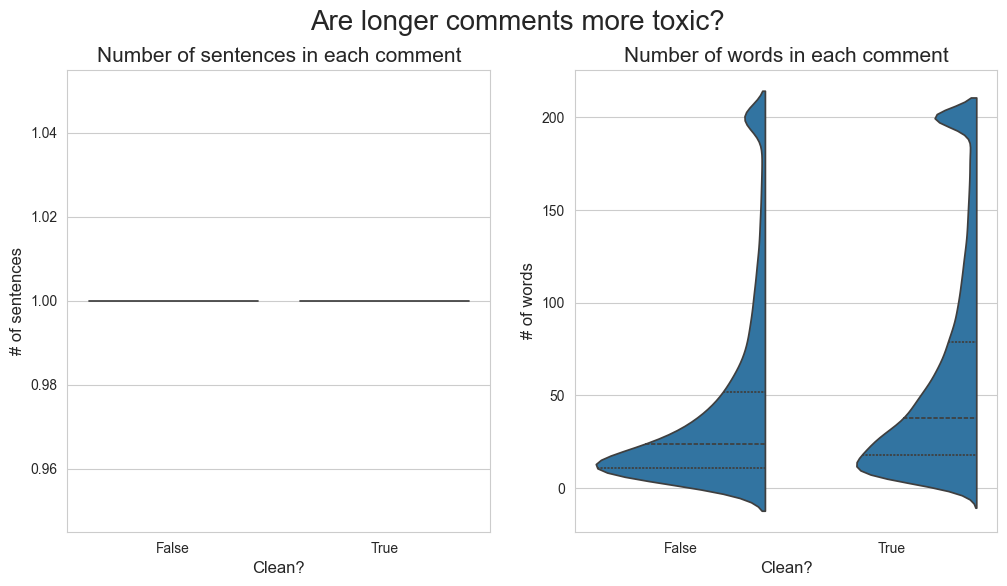

In [44]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)

train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

In [45]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200

temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')

spammers=train_feats[train_feats['word_unique_percent']<30]

In [46]:
import matplotlib.gridspec as gridspec 
color = sns.color_palette()

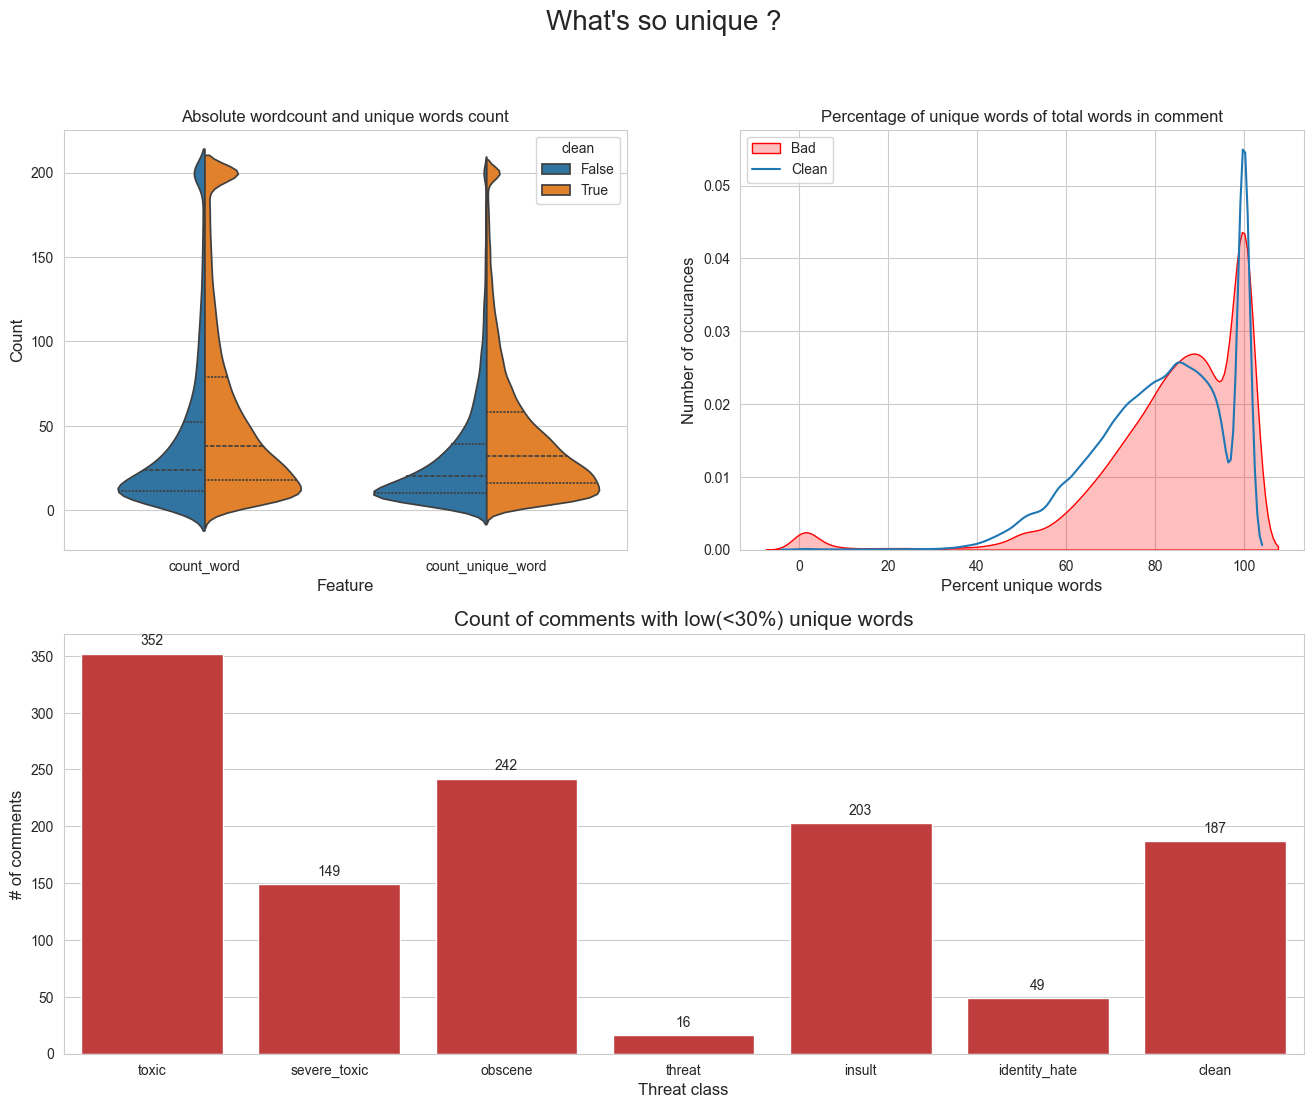

In [47]:
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")

ax=sns.kdeplot(train_feats[train_feats.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train_feats[train_feats.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)
x=spammers.iloc[:,-7:].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])


rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

In [48]:
train['sum_harmful'] = 0
for col in target_cols:
    train['sum_harmful'] += train[col]
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,True,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,True,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,True,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,True,0


In [49]:
train['len_of_text'] = train['comment_text'].apply(len)

In [50]:
print(train['len_of_text'])

0         252
1          92
2         233
3         611
4          67
         ... 
159566    278
159567     83
159568     75
159569    116
159570    174
Name: len_of_text, Length: 159571, dtype: int64


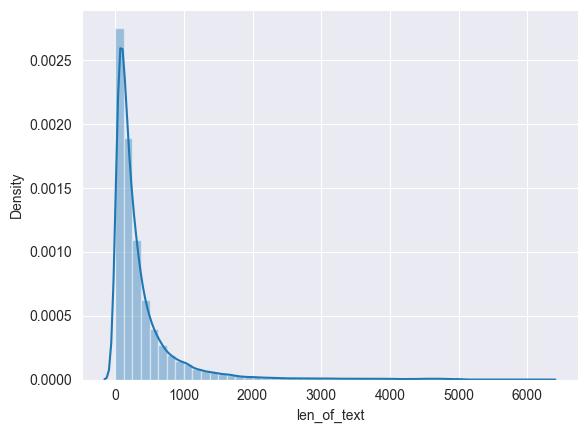

In [51]:
sns.set_style("darkgrid")
sns.distplot(train['len_of_text'],kde=True)
plt.show()

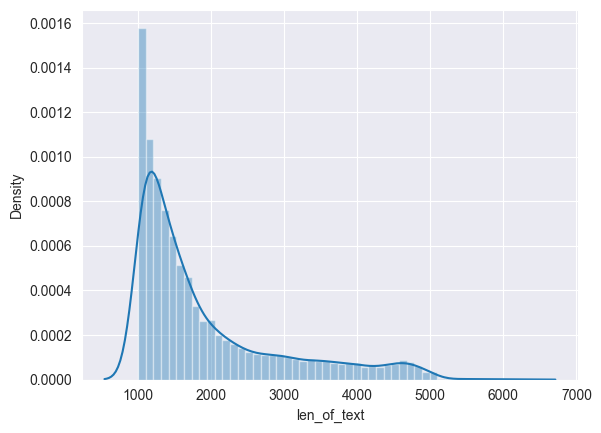

In [52]:
x = train.loc[train['len_of_text'] > 1000,'len_of_text']
sns.distplot(x,kde=True)
plt.show()

sum_harmful
0    11911
1      390
3      136
2      119
4      117
5       22
6        2
Name: count, dtype: int64


<Axes: ylabel='count'>

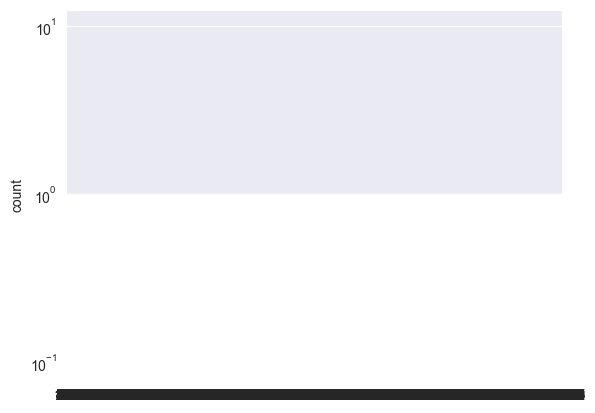

In [53]:
print(train.loc[train['len_of_text'] > 1000,'sum_harmful'].value_counts())

plt.yscale('log')
display(sns.countplot(train.loc[train['len_of_text'] > 1000,'sum_harmful']))

In [54]:
plt.yscale('log')
sns.countplot(train['sum_harmful'])
plt.show()

KeyboardInterrupt: 

In [55]:
train['sum_harmful']

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: sum_harmful, Length: 159571, dtype: int64

In [56]:
train['sum_harmful'].value_counts()

sum_harmful
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64

In [57]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_harmful,len_of_text
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.219952,379.955255
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.748260,571.583826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,197.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,421.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6251.000000


In [58]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [59]:
train['preprocess_text'] = train['comment_text'].apply(clean_text)
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True,0,252,explanation why the edits made under my userna...
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,True,0,92,d aww he matches this background colour i m se...
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,True,0,233,hey man i m really not trying to edit war it s...


In [60]:
from nltk.corpus import stopwords

In [61]:
corpus=merge.comment_text

In [62]:
from nltk.tokenize import TweetTokenizer 
tokenizer=TweetTokenizer()

In [63]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

In [64]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [65]:
def clean(comment):

    comment=comment.lower()
    
    comment=re.sub("\\n","",comment)
    
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    
    comment=re.sub("\[\[.*\]","",comment)
    
    
    words=tokenizer.tokenize(comment)
    

    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    clean_sent=" ".join(words)
    
    return(clean_sent)


In [66]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ananya/nltk_data...


True

In [67]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/ananya/nltk_data...


True

In [68]:
start_time=time.time()

In [69]:
clean_corpus=corpus.apply(lambda x :clean(x))

end_time=time.time()
print("total time till Cleaning",end_time-start_time)

total time till Cleaning 79.08472108840942


In [74]:
cv = CountVectorizer() 

documents = train.comment_text.tolist()
documents = [' '.join(documents)] 

X = cv.fit_transform(documents).toarray()
freqs = X.transpose().flatten() 

# Array mapping from feature integer indices to feature name.
words = cv.get_feature_names_out() 
print(words)

df_word = pd.DataFrame({'word': words, 'freq': freqs})
df_word = df_word.sort_values(by='freq', ascending=False)

df_word = df_word.reset_index().drop(['index'],axis=1)
df_word[:10]

['aa' 'aab' 'aaba' ... 'zzuuzz' 'zzy' 'zzyzwicz']


,word,freq
0,the,497272
1,to,297534
2,of,225087
3,and,224305
4,you,218726
5,is,176505
6,that,160880
7,it,148845
8,in,146259
9,for,102986


In [75]:
stopwords_list = df_word.word.tolist()[:70]
print('stop words list',len(stopwords_list))
print(stopwords_list[:70],'...')


from nltk.corpus import stopwords
stopwords_list+=stopwords.words('english')
stopwords = set(stopwords_list)
print(' ')
print("stopwords len : ", len(stopwords))

stop words list 70
['the', 'to', 'of', 'and', 'you', 'is', 'that', 'it', 'in', 'for', 'this', 'not', 'on', 'be', 'as', 'have', 'are', 'your', 'with', 'if', 'article', 'was', 'or', 'but', 'wikipedia', 'page', 'my', 'an', 'from', 'by', 'do', 'at', 'can', 'talk', 'me', 'about', 'so', 'what', 'there', 'all', 'has', 'will', 'please', 'no', 'they', 'would', 'he', 'one', 'like', 'just', 'we', 'which', 'any', 'been', 'should', 'don', 'more', 'some', 'other', 'here', 'who', 'see', 'also', 'his', 'fuck', 'think', 'because', 'know', 'how', 'people'] ...
 
stopwords len :  193


In [76]:
from nltk.tokenize import word_tokenize


def remove_stopwords(text):
    stopwords_list = stopwords
    word_tokens = word_tokenize(text)
    result = []
    for w in word_tokens:
        if len(w)>2 and w not in stopwords_list:
            result.append(w)
    return ' '.join(result)


def remove_special(text, lower=True):
    if lower:
        text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = " ".join(
        text.split()
    )
    return text

def remove_repeat(text, repeat=1):
    text = text.split(' ')
    result = []
    for word in text:
        if result.count(word)<repeat:
            result.append(word)
    return ' '.join(result)



In [77]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ananya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [78]:
train['preprocess_text'] = train['preprocess_text'].apply(remove_special)
train['preprocess_text'] = train['preprocess_text'].apply(remove_stopwords)


In [79]:
test['preprocess_text'] = test['comment_text'].apply(clean_text)
test['preprocess_text'] = test['preprocess_text'].apply(remove_special)
test['preprocess_text'] = test['preprocess_text'].apply(remove_stopwords)

count    159571.000000
mean         31.174261
std          49.551147
min           1.000000
25%           7.000000
50%          16.000000
75%          34.000000
max        1251.000000
Name: preprocess_text, dtype: float64


<Axes: xlabel='preprocess_text', ylabel='Density'>

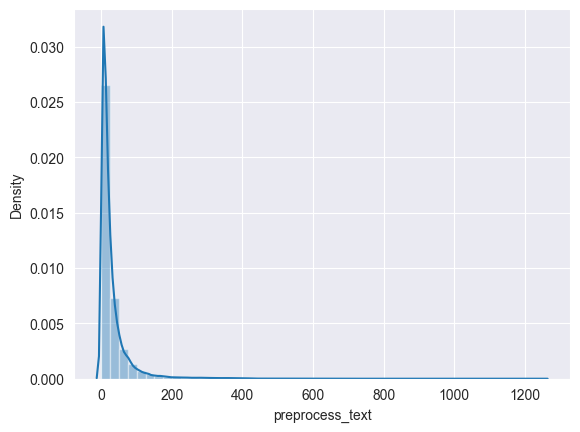

In [80]:
def num_of_word(text):
    return len(text.split(' '))

tmp = train['preprocess_text'].apply(num_of_word)
print(tmp.describe())
sns.distplot(tmp)

In [81]:
train['num_of_word'] = train['preprocess_text'].apply(num_of_word)
display(train[(train['num_of_word'] > 500)&(train['num_of_word'] < 1000)].head(3))
display(train[train['num_of_word'] > 1000])

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word
4174,0b2055f13934a41e,ii can still post with this computer i said bl...,1,0,1,0,1,0,False,3,4944,still post computer said block come arrest san...,519
4712,0c7c341727488579,do go fuck off bastard do yyou have a life ...,1,1,1,1,1,0,False,5,4976,bastard yyou life bastard yank cock ass hate h...,697
5220,0de42f5e853a41ef,hate you hate you hate you hate you h...,1,0,0,0,1,0,False,2,6078,hate hate hate hate hate hate hate hate hate h...,555


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word
6572,118e2e7cd2b30188,sex sex sex sex sex sex sex sexsex sex sex sex...,1,0,0,0,0,0,False,1,4999,sex sex sex sex sex sex sex sexsex sex sex sex...,1001
32143,5572234220e43ea2,pig pig pig pig pig pig pig pig pig pig pig pi...,1,0,0,0,0,0,False,1,4999,pig pig pig pig pig pig pig pig pig pig pig pi...,1250
32400,56311e1c0b2cbb52,that was really milleseconds wasnt it bitch fa...,1,0,1,0,1,1,False,4,5596,really milleseconds wasnt bitch fat jew fat je...,1239
76598,cd135d9358a9e9ea,die fag die fag die fag die fag die fag die fa...,1,0,0,0,0,0,False,1,4999,die fag die fag die fag die fag die fag die fa...,1250
150039,65d66bf057752682,lol lol lol lol lol lol lol lol lol lol lol lo...,0,0,0,0,0,0,True,0,4999,lol lol lol lol lol lol lol lol lol lol lol lo...,1250
153353,9bb20c51c9fec236,fat jew fat jew fat jew fat jew fat jew f...,1,0,0,0,1,1,False,3,5624,fat jew fat jew fat jew fat jew fat jew fat je...,1251


In [82]:
train['remove_repeat'] = train['preprocess_text'].apply(remove_repeat)
test['remove_repeat'] = test['preprocess_text'].apply(remove_repeat)

display(train.head(3))
display(test.head(3))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,sum_harmful,len_of_text,preprocess_text,num_of_word,remove_repeat
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True,0,252,explanation edits made username hardcore metal...,20,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,True,0,92,aww matches background colour seemingly stuck ...,9,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,True,0,233,hey man really trying edit war guy constantly ...,19,hey man really trying edit war guy constantly ...


,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity,preprocess_text,remove_repeat
0,yo bitch ja rule is more succesful then you ll...,00001cee341fdb12,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,bitch rule succesful ever whats hating sad bit...,bitch rule succesful ever whats hating sad sla...
1,from rfc the title is fine as it is imo,0000247867823ef7,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,rfc title fine imo,rfc title fine imo
2,sources zawe ashton on lapland,00013b17ad220c46,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,sources zawe ashton lapland,sources zawe ashton lapland


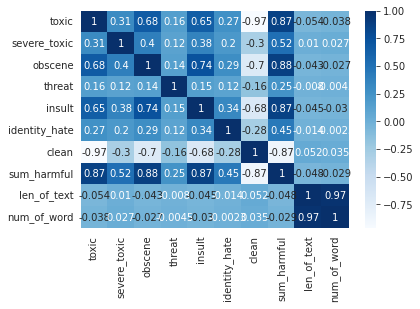

In [63]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap='Blues',annot=True)
plt.show()

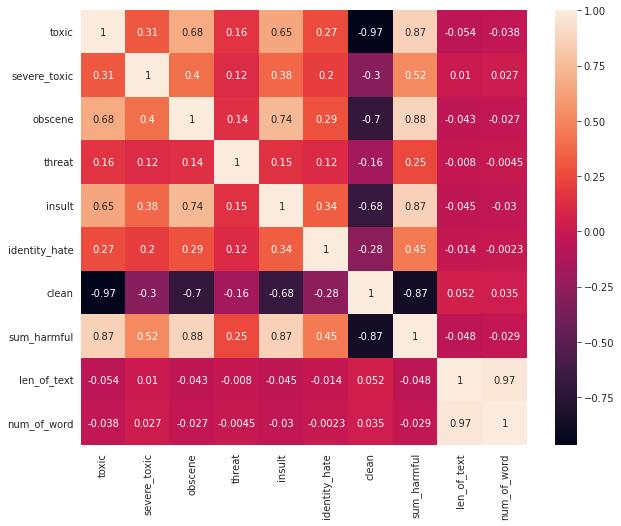

In [64]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [83]:
def top_tfidf_feats(row, features, top_n=25):
    
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)
    
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(
    min_df=150, 
    max_features=30000,
    strip_accents='unicode', 
    analyzer='word',
    ngram_range=(2, 2),
    use_idf=True,  # use_idf as boolean True
    smooth_idf=True,  # smooth_idf as boolean True
    sublinear_tf=True,  # sublinear_tf as boolean True
    stop_words='english'
)

tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names_out())
train_bigrams = tfv.transform(clean_corpus.iloc[:train.shape[0]])
test_bigrams = tfv.transform(clean_corpus.iloc[train.shape[0]:])
# get top n for bigrams
tfidf_top_n_per_lass = top_feats_by_class(train_bigrams, features)


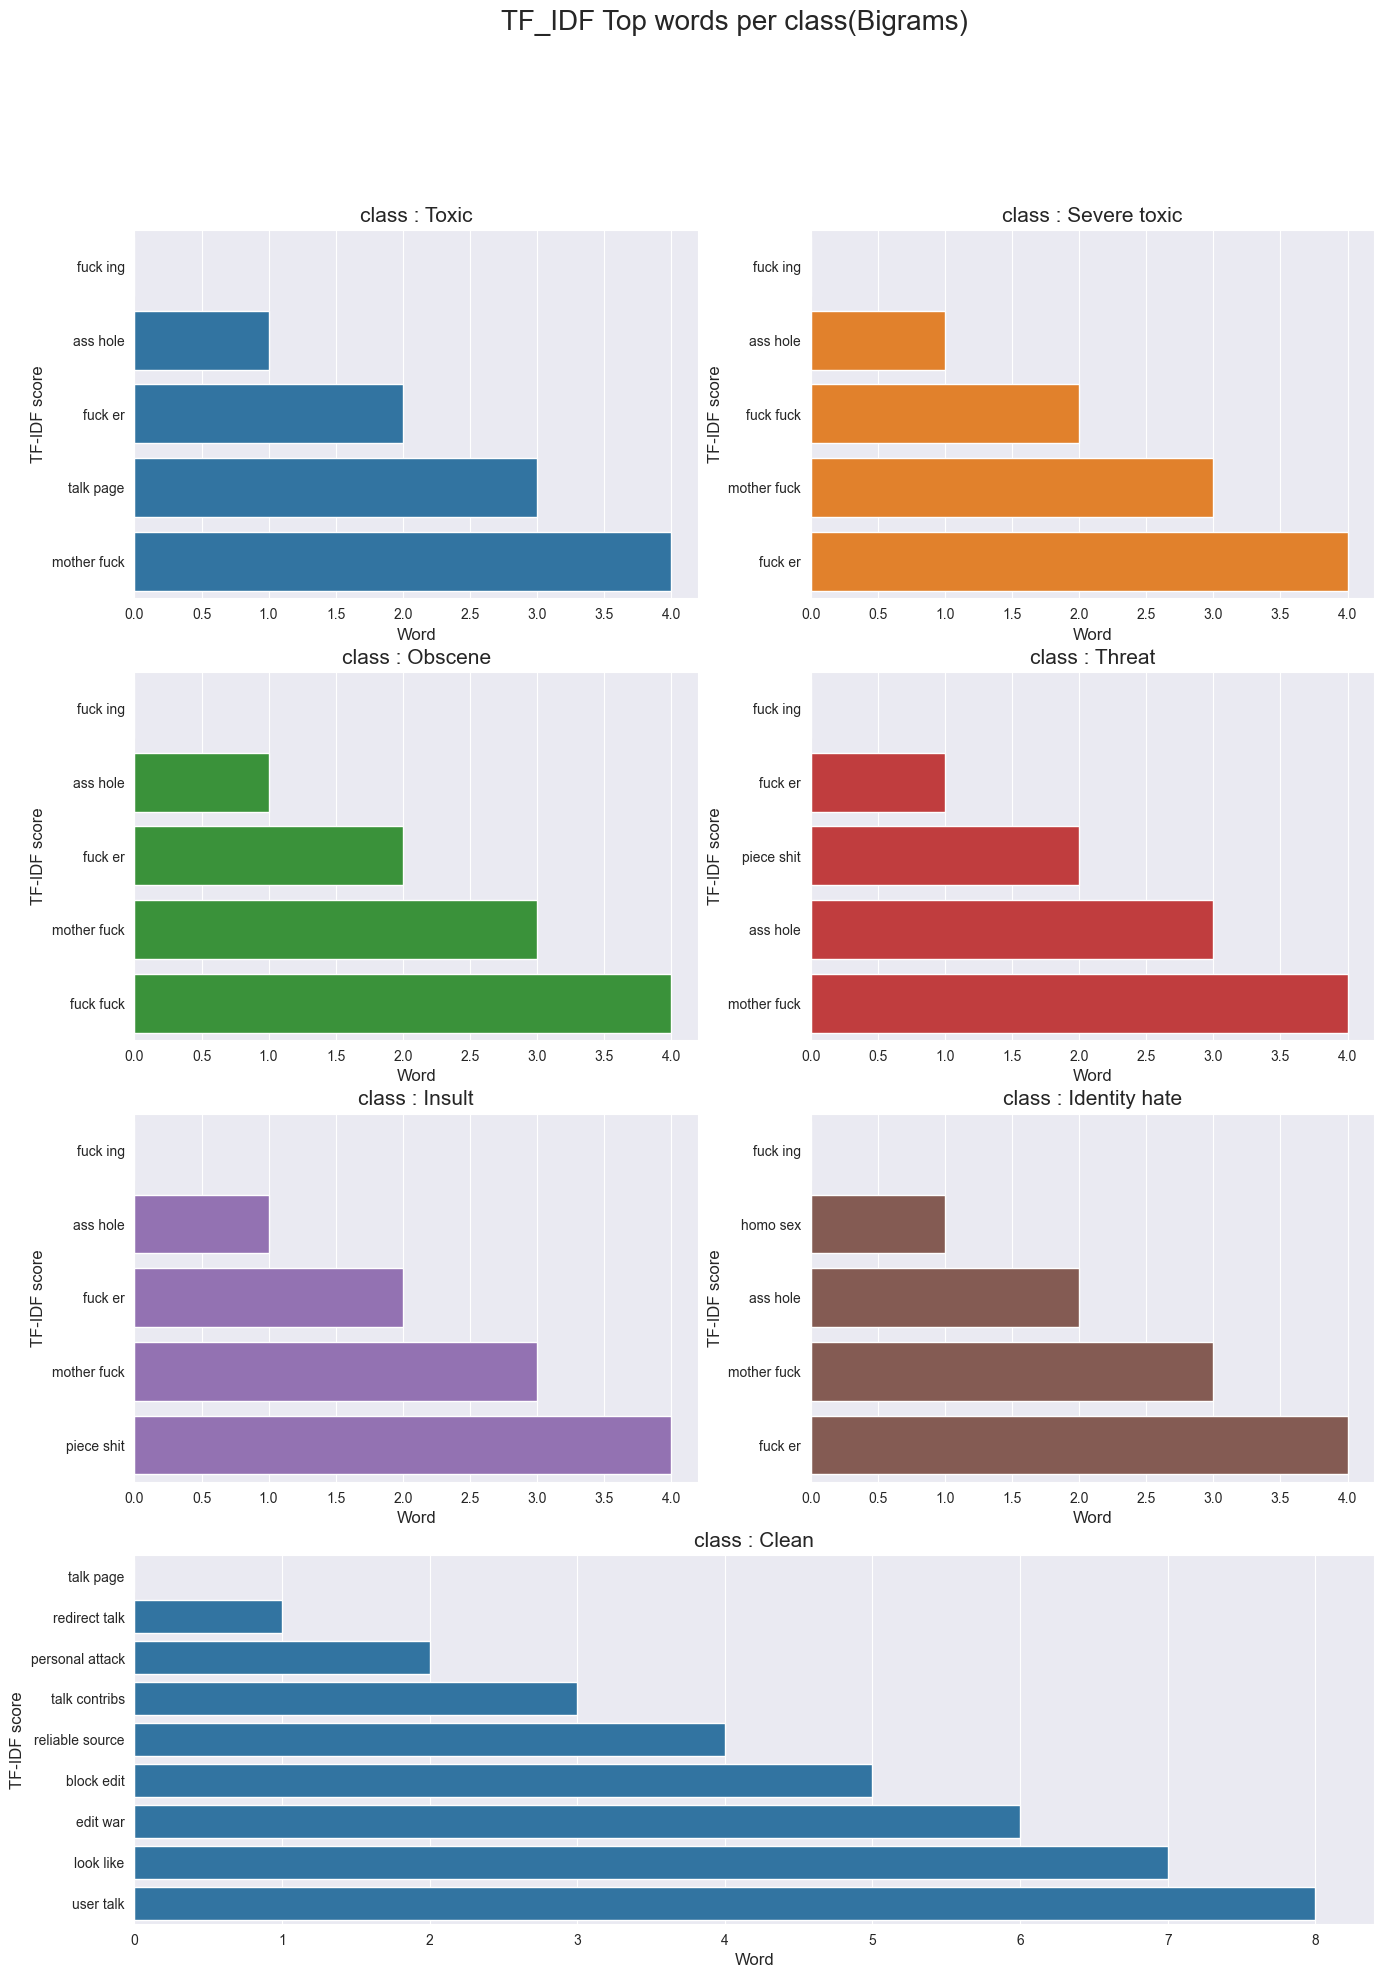

In [89]:
plt.figure(figsize=(16,22))
plt.suptitle("TF_IDF Top words per class(Bigrams)",fontsize=20)
gridspec.GridSpec(4,2)
plt.subplot2grid((4,2),(0,0))
sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:5],color=color[0])
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(0,1))
sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:5],color=color[1])
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(1,0))
sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:5],color=color[2])
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(1,1))
sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:5],color=color[3])
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(2,0))
sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:5],color=color[4])
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(2,1))
sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:5],color=color[5])
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((4,2),(3,0),colspan=2)
sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:9])
plt.title("class : Clean",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.show()


In [90]:
#TFIDF vectorization
preprocess_text = train.preprocess_text

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(preprocess_text)
y = train[target_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train.shape[0])
print('X_valid len:  ',  X_valid.shape[0])

X_train len:  127656
X_valid len:   31915


In [91]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = LogisticRegression()
    model.fit(X_train,y)
    y_pred = model.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.95316
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98982
 
----prediction of obscene column----
 
Testing accuracy is 0.97083
 
----prediction of threat column----
 
Testing accuracy is 0.99724
 
----prediction of insult column----
 
Testing accuracy is 0.96842
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99167


In [100]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train2.shape[0])
print('X_valid len:  ',  X_valid2.shape[0])

X_train len:  127656
X_valid len:   31915


In [93]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model2 = LogisticRegression()
    model2.fit(X_train2,y)
    y_pred2 = model.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.90287
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98966
 
----prediction of obscene column----
 
Testing accuracy is 0.94683
 
----prediction of threat column----
 
Testing accuracy is 0.99712
 
----prediction of insult column----
 
Testing accuracy is 0.95009
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99063


In [101]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.92565,0.98863,0.95808,0.99702,0.95779,0.99073
remove_rep,0.92458,0.98847,0.95795,0.99687,0.95748,0.99116


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model1 = KNeighborsClassifier(n_neighbors=3)
    model1.fit(X_train,y)
    y_pred = model1.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.92565
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98863
 
----prediction of obscene column----
 
Testing accuracy is 0.95808
 
----prediction of threat column----
 
Testing accuracy is 0.99702
 
----prediction of insult column----
 
Testing accuracy is 0.95779
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99073


In [104]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)

print('X_train len: ', X_train2.shape[0])
print('X_valid len:  ',  X_valid2.shape[0])

X_train len:  127656
X_valid len:   31915


In [105]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = KNeighborsClassifier(n_neighbors=3)
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.92458
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98847
 
----prediction of obscene column----
 
Testing accuracy is 0.95795
 
----prediction of threat column----
 
Testing accuracy is 0.99687
 
----prediction of insult column----
 
Testing accuracy is 0.95748
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99116


In [106]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp


,toxic,severe_toxic,obscene,threat,insult,identity_hate
allow_rep,0.92565,0.98863,0.95808,0.99702,0.95779,0.99073
remove_rep,0.92458,0.98847,0.95795,0.99687,0.95748,0.99116


In [107]:
from sklearn import tree

In [108]:
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model1 = KNeighborsClassifier(n_neighbors=3)
    model1.fit(X_train,y)
    y_pred = model1.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))

 
----prediction of toxic column----
 
Testing accuracy is 0.92565
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98863
 
----prediction of obscene column----
 
Testing accuracy is 0.95808
 
----prediction of threat column----
 
Testing accuracy is 0.99702
 
----prediction of insult column----
 
Testing accuracy is 0.95779
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99073


In [109]:
remove_repeat_text = train.remove_repeat

vectorizer2 = TfidfVectorizer(max_features=5000)

X2 = vectorizer2.fit_transform(remove_repeat_text)
y = train[target_cols]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.2, random_state=0)


In [110]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = KNeighborsClassifier(n_neighbors=3)
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


 
----prediction of toxic column----
 
Testing accuracy is 0.92458
 
----prediction of severe_toxic column----
 
Testing accuracy is 0.98847
 
----prediction of obscene column----
 
Testing accuracy is 0.95795
 
----prediction of threat column----
 
Testing accuracy is 0.99687
 
----prediction of insult column----
 
Testing accuracy is 0.95748
 
----prediction of identity_hate column----
 
Testing accuracy is 0.99116


In [115]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp

,toxic,severe_toxic,obscene,threat
allow_rep,0.94789,0.98982,0.96873,0.99724
remove_rep,0.94789,0.98982,0.96873,0.99724


In [116]:
from sklearn.svm import SVC

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [120]:
pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd

# Load your dataset
df1 = pd.read_csv('266_Data/train_preprocessed.csv')

# Display the first few rows of the dataframe
print(df1.head())

# Display summary statistics for the comment lengths
print(df1['comment_text'].apply(len).describe())

# Display counts for each category
print(df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum())


                                        comment_text                id  \
0  explanation why the edits made under my userna...  0000997932d777bf   
1  d aww  he matches this background colour i m s...  000103f0d9cfb60f   
2  hey man  i m really not trying to edit war  it...  000113f07ec002fd   
3    more i can t make any real suggestions on im...  0001b41b1c6bb37e   
4  you  sir  are my hero  any chance you remember...  0001d958c54c6e35   

   identity_hate  insult  obscene    set  severe_toxic  threat  toxic  \
0            0.0     0.0      0.0  train           0.0     0.0    0.0   
1            0.0     0.0      0.0  train           0.0     0.0    0.0   
2            0.0     0.0      0.0  train           0.0     0.0    0.0   
3            0.0     0.0      0.0  train           0.0     0.0    0.0   
4            0.0     0.0      0.0  train           0.0     0.0    0.0   

   toxicity  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
count    159571.000000
mean     

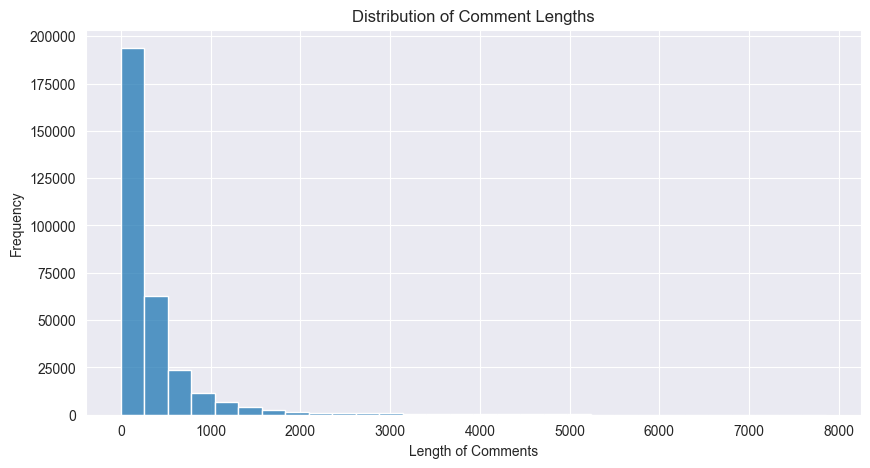

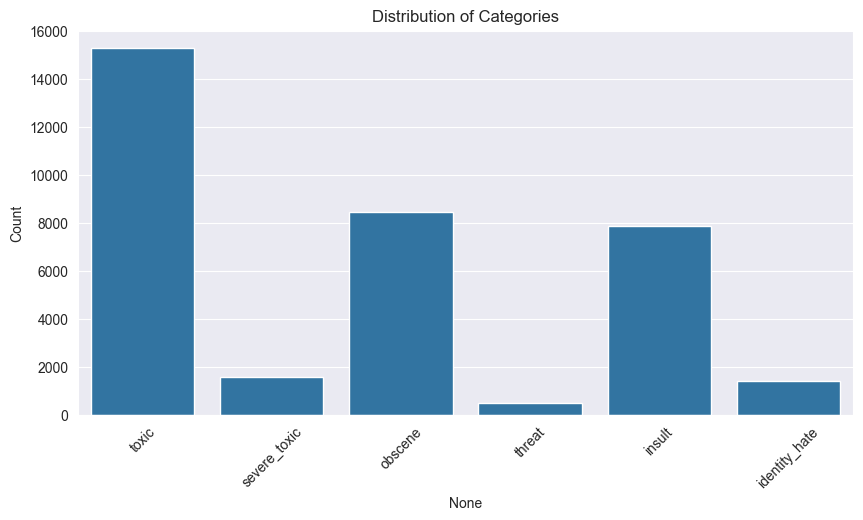

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of comment lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['comment_text'].apply(len), bins=30, kde=False)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of toxic vs non-toxic
category_counts = df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [127]:
# Check for null values
print(df1.isnull().sum())

# Check data types
print(df.dtypes)


comment_text     0
id               0
identity_hate    0
insult           0
obscene          0
set              0
severe_toxic     0
threat           0
toxic            0
toxicity         0
dtype: int64
id                      object
comment_text            object
count_sent               int64
count_word               int64
count_unique_word        int64
count_letters            int64
count_punctuations       int64
count_words_upper        int64
count_words_title        int64
count_stopwords          int64
mean_word_len          float64
word_unique_percent    float64
punct_percent          float64
dtype: object


Document ID: b89fc98e8213c0c7 -> 15 similar documents found
Document ID: 1feeb364bf3b0844 -> 1 similar documents found
Document ID: 891a2a0f1df2a52f -> 209 similar documents found
Document ID: 6491dea2b68674a7 -> 13 similar documents found
Document ID: 0c9eef1291980b06 -> 225 similar documents found
Document ID: 792fbbc8349b453e -> 143 similar documents found
Document ID: 6a8b66f3f7ed8529 -> 47 similar documents found
Document ID: 453657883aea243c -> 73 similar documents found
Document ID: 9a18102d90cb15d2 -> 10 similar documents found
Document ID: ad400ae066cf2b9d -> 214 similar documents found
Document ID: f136efd88cd996e7 -> 65 similar documents found
Document ID: c8875913ea6bd908 -> 5 similar documents found
Document ID: b5aea4cab05b8801 -> 119 similar documents found
Document ID: 31a0b0d9ba3e70a0 -> 12 similar documents found
Document ID: adb9457d69e76a5b -> 27 similar documents found
Document ID: e7f26385dd04567a -> 762 similar documents found
Document ID: 3997ed68a1ec4aa7 -> 246

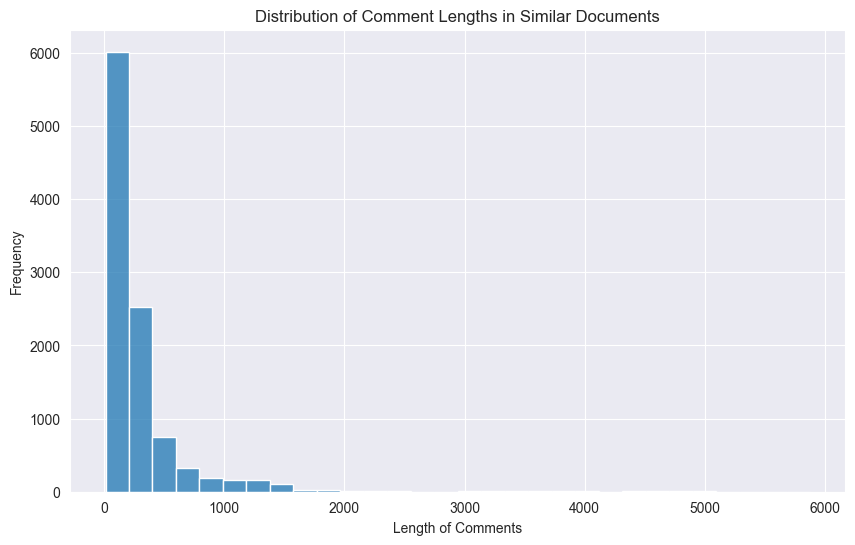

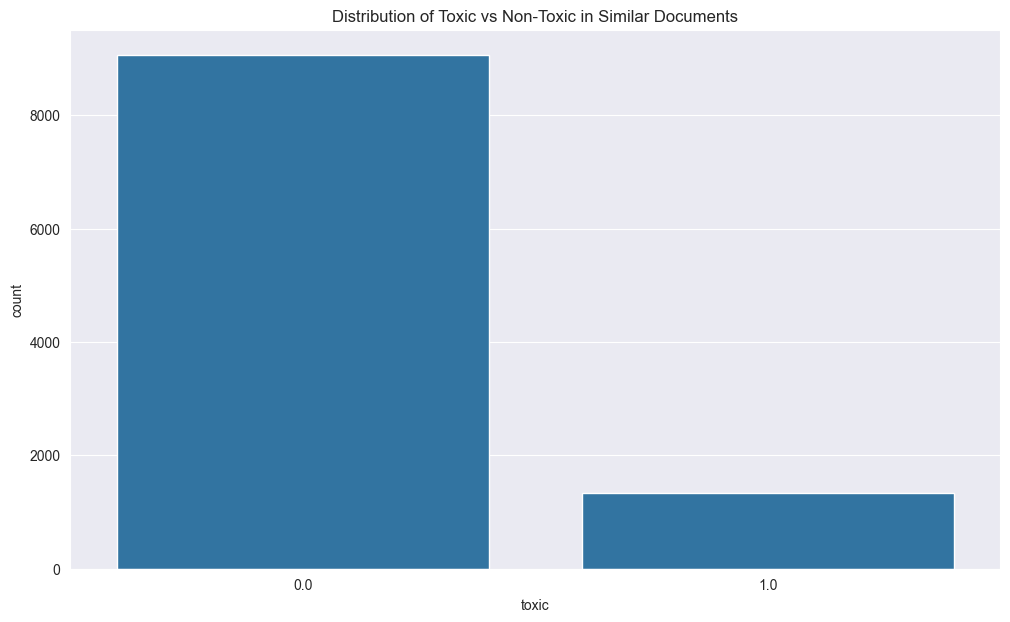

In [130]:
import pandas as pd
from datasketch import MinHash, MinHashLSH
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import random


clean_corpus = df1['comment_text'].fillna('')  # Ensure no null values

# Vectorize the text data
tfv = TfidfVectorizer(
    min_df=150, 
    max_features=30000,
    strip_accents='unicode', 
    analyzer='word',
    ngram_range=(1, 1),
    use_idf=True,  # use_idf as boolean True
    smooth_idf=True,  # smooth_idf as boolean True
    sublinear_tf=True,  # sublinear_tf as boolean True
    stop_words='english'
)

tfidf_matrix = tfv.fit_transform(clean_corpus)

# Function to convert TF-IDF vector to MinHash
def vector_to_minhash(vector, num_perm=128):
    m = MinHash(num_perm=num_perm)
    for i in vector.nonzero()[1]:
        m.update(str(i).encode('utf8'))
    return m

# Create MinHash for each document
minhashes = {}
for i, v in enumerate(tfidf_matrix):
    minhash = vector_to_minhash(v)
    minhashes[df1['id'][i]] = minhash

# Create LSH index
lsh = MinHashLSH(threshold=0.3, num_perm=128)  # Adjust threshold here
for doc_id, minhash in minhashes.items():
    lsh.insert(doc_id, minhash)


# Query LSH index for multiple documents
sample_ids = random.sample(list(df1['id']), 50)  # Randomly pick 10 document IDs
all_results = set()
for sample_id in sample_ids:
    result = lsh.query(minhashes[sample_id])
    all_results.update(result)

# Collect the resulting documents for EDA
resulting_docs = df1[df1['id'].isin(all_results)]

# Debug: print the number of similar documents for each sample
for sample_id in sample_ids:
    result = lsh.query(minhashes[sample_id])
    print(f"Document ID: {sample_id} -> {len(result)} similar documents found")
# Print some sample texts from the resulting documents
for text in resulting_docs['comment_text'].sample(5):
    print(text)
    print("-----")


# EDA on the resulting_docs
print("Number of documents similar to the sample document:", len(resulting_docs))
print("Sample of resulting documents:")
print(resulting_docs.head())

# Histogram of the length of comments in the resulting documents
resulting_docs['text_length'] = resulting_docs['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(resulting_docs['text_length'], bins=30, kde=False)
plt.title('Distribution of Comment Lengths in Similar Documents')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of any associated labels
if 'toxic' in resulting_docs.columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=resulting_docs, x='toxic')
    plt.title('Distribution of Toxic vs Non-Toxic in Similar Documents')
    plt.show()

# Other plots as required


In [ ]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train2[col]
    model12 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
    model12.fit(X_train2,y)
    y_pred2 = model12.predict(X_valid2)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid2[col], y_pred2),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid2[col], y_pred2),5))


In [ ]:
tmp = pd.DataFrame(accuracy_data, index=['allow_rep','remove_rep'])
tmp
